# Gravitational orbit using Lagrange's equation

Adapt Orbit class that is used to generate orbit plots from solving Lagrange's equations.

## Euler-Lagrange equation

For a two-body system, the Lagrangian with Cartesian coordinates is

$\begin{align}
  \mathcal{L} = \frac12 m_1 (\dot x_1 ^2 + \dot y_1 ^2) + \frac12 m_1 (\dot x_2 ^2 + \dot y_2 ^2)\
  + \frac{G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_1}} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_1  \ddot x_1 = \frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \ \mbox{or}\ \ddot x_1 = \frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_1}} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_1  \ddot y_1 = \frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \ \mbox{or}\ \ddot y_1 = \frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_2}} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_2  \ddot x_2 = -\frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \ \mbox{or}\ \ddot x_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_2}} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_2  \ddot y_2 = -\frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \ \mbox{or}\ \ddot y_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \;.
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class Orbit():
    """
    Orbit class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    m1 : float
        mass of first body
    m2 : float
        mass of second body
    G : float
        gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 8-component vector with 
                                    y[0] = x_1(t) and y[1] = x_dot_1(t)
                                    y[2] = y_1(t) and y[3] = y_dot_1(t)
                                    y[4] = x_2(t) and y[5] = x_dot_2(t)
                                    y[6] = y_2(t) and y[7] = y_dot_2(t)
            
            
        Returns
        -------
        
        """
        dom = np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
        return [\
                y[1], self.G *self.m2 * (y[4]-y[0])/dom**3, \
                y[3], self.G *self.m2 * (y[6]-y[2])/dom**3,\
                y[5], -self.G *self.m1 * (y[4]-y[0])/dom**3,\
                y[7], -self.G *self.m1 * (y[6]-y[2])/dom**3,\
               ]
    def solve_ode(self, t_pts, x_1_0, x_1_dot_0, 
                  y_1_0,y_1_dot_0, x_2_0,x_2_dot_0,
                  y_2_0,y_2_dot_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x_1_0, x_1_dot_0,y_1_0, y_1_dot_0, x_2_0,x_2_dot_0,y_2_0,y_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y

        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots of orbit using solve_ivp

C:\Users\jozy9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


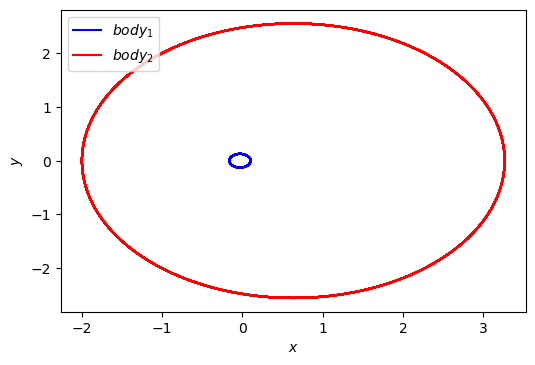

In [8]:

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 20.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 20.
m2 = 1.
G = 20.

# Instantiate a Two-body system
p1 = Orbit(m1=m1, m2=m2, G=G)

# Instantiate inital conditions

x_1_0, x_1_dot_0 = 0.1, 0.
y_1_0, y_1_dot_0 = 0., 0.75
x_2_0,x_2_dot_0 = - (m1/m2) * x_1_0, - (m1/m2) * x_1_dot_0
y_2_0,y_2_dot_0 = - (m1/m2) * y_1_0, - (m1/m2) * y_1_dot_0

x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = p1.solve_ode(t_pts,x_1_0, x_1_dot_0,y_1_0, y_1_dot_0,\
                                                            x_2_0,x_2_dot_0,y_2_0,y_2_dot_0)

# Make figures of x_1 vs y_1 and x_2 vs y_2
plt.subplot(1,1,1)
plt.plot(x_1,y_1,'b',label='$body_1$')
plt.plot(x_2,y_2,'r',label='$body_2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()



Now we switch to Leapfrog method, repeat the previous steps